In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import regex as re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')


from gensim.models import Word2Vec


import warnings 
warnings.filterwarnings(action = 'ignore')


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
reddit = pd.read_csv('sample_comments.csv', index_col=0)

reddit.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minio...
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ende...


In [3]:
# custom tokenizer function

def tokenizer(series):
    
    corpus = series.values
    tokens = []
    
    for document in corpus:
        #removing punctuation
        for punc in string.punctuation:
            document = document.replace(punc, '')
        # removing numbers and splitting sentences    
        document = re.sub("\d+", "", document).lower()
        tokens.append(document.split(' '))
        
    
        

    return tokens

In [4]:
X = reddit['comment']
y = reddit['label']

In [5]:
X.values

array(['Nope.', 'Donde esta la biblioteca?',
       'I feel bad for the mummy... not even the minions want to get close to him :(',
       ...,
       'You have to remember that only their black lives matter.......................',
       "Learning few words of the local language when you do to a country wouldn't kill you.",
       'We could have the pre and post parties at the new fake 400 bar!'],
      dtype=object)

In [6]:
tokenizer(X[:2])

[['nope'], ['donde', 'esta', 'la', 'biblioteca']]

In [7]:
tokenized_data = tokenizer(X)

In [8]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4)
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(10361226, 13178775)

In [9]:
model.most_similar('sarcastic')

[('facetious', 0.8223916292190552),
 ('aggressor', 0.7684721350669861),
 ('bitbybit', 0.7398645281791687),
 ('pedantic', 0.7342798113822937),
 ('detained', 0.7140474319458008),
 ('obtuse', 0.7075532674789429),
 ('suspendedbanned', 0.7023723125457764),
 ('gorssi', 0.6952130198478699),
 ('glamorouslion', 0.6774652004241943),
 ('polyglot', 0.6701116561889648)]

In [10]:
model.most_similar('sarcasm')

[('comment', 0.6437023282051086),
 ('text', 0.610785722732544),
 ('satire', 0.6069098711013794),
 ('tag', 0.6054913997650146),
 ('nsfw', 0.6004536151885986),
 ('post', 0.5957586169242859),
 ('username', 0.5869153738021851),
 ('reply', 0.5826002955436707),
 ('op', 0.5642368197441101),
 ('context', 0.5590019226074219)]

In [11]:
model.most_similar('satire')

[('incorrect', 0.7735333442687988),
 ('factually', 0.7582775354385376),
 ('flawed', 0.7536082863807678),
 ('moleskine', 0.7447558641433716),
 ('silliness', 0.738822340965271),
 ('kayfabe', 0.7379746437072754),
 ('inaccurate', 0.7313666343688965),
 ('visionary', 0.7310663461685181),
 ('censorship', 0.7297487854957581),
 ('technicality', 0.7287907004356384)]

In [12]:
model.most_similar(positive=['joke', 'sarcastic'])

[('facetious', 0.6857595443725586),
 ('joking', 0.6691835522651672),
 ('bitbybit', 0.6486337780952454),
 ('obtuse', 0.632790207862854),
 ('satire', 0.6318671703338623),
 ('superstorm', 0.627595067024231),
 ('rnjesus', 0.6219795942306519),
 ('kmfdm', 0.614089846611023),
 ('nonmainstream', 0.6140598058700562),
 ('matante', 0.6140228509902954)]

In [13]:
model.most_similar(positive=['pedantic', 'sarcastic'], negative=['joke'], topn=5)

[('facetious', 0.6974167227745056),
 ('exleo', 0.689556896686554),
 ('relocated', 0.6881237030029297),
 ('achievementist', 0.6790684461593628),
 ('staggered', 0.6761832237243652)]

In [14]:
model.most_similar(positive=['politics', 'sarcasm'])

[('bigotry', 0.684384286403656),
 ('islam', 0.6730672121047974),
 ('censorship', 0.6333011984825134),
 ('gamergate', 0.6281830668449402),
 ('racism', 0.6215910911560059),
 ('ignorance', 0.6200709342956543),
 ('statements', 0.6192768216133118),
 ('existence', 0.6184942722320557),
 ('nature', 0.6132638454437256),
 ('somethingawful', 0.6128358840942383)]

In [15]:
model.most_similar(['onion', 'facetious'])

[('duckglass', 0.8424065709114075),
 ('ezzz', 0.8341936469078064),
 ('itsnot', 0.8292207717895508),
 ('nomad', 0.8278502821922302),
 ('brooooown', 0.8170552253723145),
 ('whiiiiiiiite', 0.8112879991531372),
 ('eaaaasy', 0.7996465563774109),
 ('fujin', 0.795872151851654),
 ('cerrone', 0.7926978468894958),
 ('uu', 0.7917901277542114)]

In [16]:
sarcastic = model.most_similar(positive=['sarcastic'])
genuine = model.most_similar(positive=['genuine'])

pd.DataFrame(
        data={
            "sarcastic": [word for word, sim in sarcastic], 
            "genuine": [word for word, sim in genuine]
        }
)

,sarcastic,genuine
0,facetious,hooch
1,aggressor,uvm
2,bitbybit,kasing
3,pedantic,proportionate
4,detained,magandang
5,obtuse,anakanak
6,suspendedbanned,cobraba
7,gorssi,hueek
8,glamorouslion,materialism
9,polyglot,intersex


In [17]:
misleading = model.most_similar(positive=['misleading'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "misleading": [word for word, sim in misleading], 
            "honest": [word for word, sim in honest]
        }
)

,misleading,honest
0,clickbait,fair
1,editorialized,raked
2,clickbaitesque,grateful
3,sensationalized,sterilised
4,unintentional,prepared
5,clickbaity,thankful
6,proassad,gaddds
7,grammatical,homophonobic
8,fascinating,kinindanorf
9,blatent,rude


In [18]:
words = ['duh', 'scrub', 'obvious', 'shitlord', 'forgot', 'imo', 'although', 'honestly', 'mostly', 'unfortunate']

In [19]:
sarcasm_test = []

for word in words:
    sarcasm_test.append(model[word])

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

top_words = pca.fit_transform(sarcasm_test)

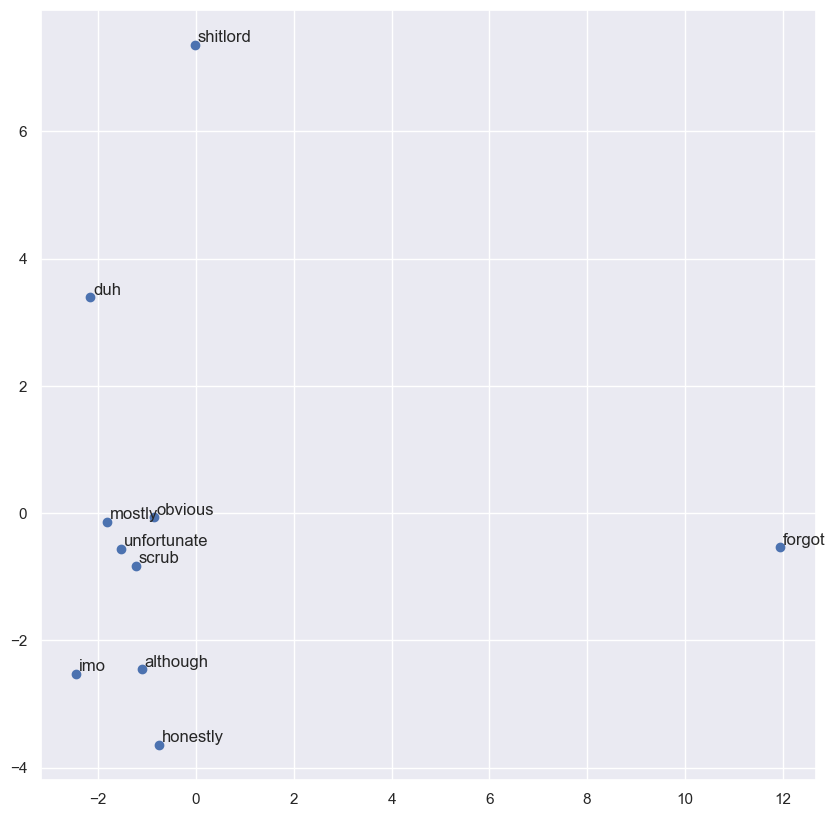

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(top_words[:,0], top_words[:,1])
            
for i, word in enumerate(words):
    plt.annotate(word, xy=(top_words[i,0], top_words[i,1]), xytext=(2,2), textcoords='offset points')

plt.show()

In [22]:
def sentence(document):
    size = model.vector_size
    word_vec_document = np.zeros(size)
    count = 1
    
    for word in document:
        if word in model:
            count +=1
            word_vec_document += model[word]
    
    word_vec_document = word_vec_document / count
    
    return word_vec_document

In [23]:
test_document = 'I love my wife. She is so beautiful.'
new_test = 'call me again tomorrow, so good to see you'

In [24]:
sentence(test_document)

array([ 2.03575868e-01, -1.24606917e-01,  4.10904684e-02,  1.17511796e-01,
       -1.67836134e-02,  1.43586998e-01,  9.40113385e-01, -9.36076465e-01,
        6.18493772e-01, -9.70455712e-02, -4.38008437e-01, -5.17745613e-01,
        5.93116185e-01,  4.97722527e-01, -5.16428556e-01,  8.55620643e-01,
       -5.84388936e-01,  8.26511679e-01,  7.01607355e-01, -3.00291034e-01,
        1.38382582e-01, -1.37794142e+00, -2.55469392e-01,  9.68423017e-01,
        7.61804982e-01,  4.67530609e-03, -1.68789747e-01,  7.32610525e-01,
       -9.58029598e-01,  5.53019220e-01, -1.16614313e+00,  4.34671949e-01,
       -1.17087349e+00,  6.26446837e-01, -1.38107879e-01, -5.89826264e-01,
        1.87314492e-01, -1.09387001e-01,  6.64476683e-01, -2.17734294e-02,
        4.23988621e-01,  6.31424649e-01, -8.30994487e-01, -7.64335080e-01,
        1.37615352e-01,  3.44531473e-01,  1.45589517e-01, -3.98674348e-02,
        4.10627308e-01,  4.33029841e-01, -6.67910106e-01, -7.95828395e-01,
       -7.09284649e-01,  

In [25]:
variable = sentence(new_test)
print(len(variable))

100


In [26]:
document_vectors = [sentence(doc) for doc in tokenized_data]

In [27]:
document_vectors[0].shape

(100,)

In [28]:
X = document_vectors

In [29]:
from sklearn.model_selection import train_test_split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.25, random_state=42)

In [31]:
len(X_train)

142131

In [32]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4, size=300, max_vocab_size=10000 )
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(8699066, 13178775)

In [33]:
mislead = model.most_similar(positive=['lie'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "lie": [word for word, sim in mislead], 
            "honest": [word for word, sim in honest]
        }
)

,lie,honest
0,talk,fair
1,complain,careful
2,forget,aggressive
3,worry,rude
4,happen,prepared
5,listen,sarcastic
6,trust,proud
7,care,offensive
8,criticize,optimistic
9,allow,ignorant


In [34]:
sarcastic = model.most_similar(positive=['sarcastic'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "sarcastic": [word for word, sim in sarcastic], 
            "honest": [word for word, sim in honest]
        }
)

,sarcastic,honest
0,facetious,fair
1,joking,careful
2,downvoted,aggressive
3,serious,rude
4,optimistic,prepared
5,rude,sarcastic
6,aggressive,proud
7,drunk,offensive
8,salty,optimistic
9,ambiguous,ignorant


In [35]:
facetious = model.most_similar(positive=['facetious'])
joking = model.most_similar(positive=['joking'])

pd.DataFrame(
        data={
            "facetious": [word for word, sim in facetious], 
            "joking": [word for word, sim in joking]
        }
)

,facetious,joking
0,sarcastic,forgetting
1,deansafbi,jealous
2,nomad,sarcastic
3,planetarium,thinking
4,isles,implying
5,renton,worried
6,ambiguous,disappointed
7,pea,talking
8,gunner,sorry
9,antisemetic,sayin


In [36]:
unfortunately = model.most_similar(positive=['unfortunately'])
honestly = model.most_similar(positive=['honestly'])

pd.DataFrame(
        data={
            "unfortunately": [word for word, sim in unfortunately], 
            "honestly": [word for word, sim in honestly]
        }
)

,unfortunately,honestly
0,sadly,tbh
1,however,disappointed
2,certainly,dunno
3,currently,actually
4,suspect,although
5,apparently,but
6,since,personally
7,claiming,impressive
8,believe,i
9,necessarily,surprised


In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
neural_network = MLPClassifier(verbose=True, max_iter=50, random_state=42)

In [38]:
neural_network.fit(X_train, y_train)

Iteration 1, loss = 0.62897090
Iteration 2, loss = 0.60577355
Iteration 3, loss = 0.59776671
Iteration 4, loss = 0.59231015
Iteration 5, loss = 0.58794447
Iteration 6, loss = 0.58453328
Iteration 7, loss = 0.58203933
Iteration 8, loss = 0.57912760
Iteration 9, loss = 0.57692757
Iteration 10, loss = 0.57468123
Iteration 11, loss = 0.57323417
Iteration 12, loss = 0.57160992
Iteration 13, loss = 0.56988815
Iteration 14, loss = 0.56836644
Iteration 15, loss = 0.56713288
Iteration 16, loss = 0.56597577
Iteration 17, loss = 0.56522233
Iteration 18, loss = 0.56444367
Iteration 19, loss = 0.56311033
Iteration 20, loss = 0.56215115
Iteration 21, loss = 0.56126869
Iteration 22, loss = 0.56030011
Iteration 23, loss = 0.55949954
Iteration 24, loss = 0.55869154
Iteration 25, loss = 0.55807721
Iteration 26, loss = 0.55756103
Iteration 27, loss = 0.55632837
Iteration 28, loss = 0.55579611
Iteration 29, loss = 0.55531223
Iteration 30, loss = 0.55523019
Iteration 31, loss = 0.55393371
Iteration 32, los

MLPClassifier(max_iter=50, verbose=True)

In [39]:
print(f'Train: {neural_network.score(X_train, y_train)}')
print(f'Val: {neural_network.score(X_val, y_val)}')


Train: 0.7211375421266296
Val: 0.6721896238760606
